In [1]:
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from collections import defaultdict, Counter
import numpy as np

In [2]:
nlp = spacy.load('en_core_web_sm')

In [3]:
data = "rand-terrorism-dataset.txt"

In [4]:
with open(data, "r", encoding="utf-8") as f:
    text = f.readlines()

In [5]:
len(text)

10032

In [6]:
text[:3]

['CHILE.  An explosion from a single stick of dynamite went off on the patio of the Santiago Binational Center, causing $21,000 in damages.\n',
 'ISRAEL.  Palestinian terrorists fired five mortar shells into the collective settlement at Masada, causing slight damage but no injuries.\n',
 'GUATEMALA.  A bomb was thrown over the wall surrounding the U.S. Marines guards house in Guatemala City, causing damage but no injuries.\n']

In [7]:
nlpList = [nlp(line) for line in tqdm(text)]

  0%|          | 0/10032 [00:00<?, ?it/s]

In [8]:
common_terroism_groups = [
    'taliban',
    'al - qaeda',
    'hamas',
    'fatah',
    'plo',
    'bilad al - rafidayn'
]
common_terroism_groups_counter = Counter()

common_locations = [
    'iraq',
    'baghdad',
    'kirkuk',
    'mosul' ,
    'afghanistan' ,
    'kabul' ,
    'basra' ,
    'palestine' ,
    'gaza' ,
    'israel' ,
    'istanbul' ,
    'beirut' ,
    'pakistan'
]
common_locations_counter = Counter()

In [9]:
location_entity_dict = defaultdict(Counter)

In [10]:
nlpList[0].ents[0].label_

'GPE'

In [11]:
for line in tqdm(nlpList):
    t_ist = [ent.lemma_ for ent in line.ents if ent.label_=='PERSON' or ent.label_=='ORG']
    locations = [ent.lemma_ for ent in line.ents if ent.label_=='GPE']
    common_terroism_groups_counter.update(t_ist)
    common_locations_counter.update(locations)
    for l in locations:
            location_entity_dict[l].update(t_ist)

  0%|          | 0/10032 [00:00<?, ?it/s]

In [12]:
common_locations_counter

Counter({'Iraq': 1631,
         'Baghdad': 1244,
         'Thailand': 816,
         'US': 397,
         'U.S.': 323,
         'Kirkuk': 259,
         'Mosul': 252,
         'Israel': 176,
         'LEBANON': 166,
         'Afghanistan': 158,
         'Baqubah': 147,
         'FRANCE': 130,
         'Athens': 128,
         'Beirut': 119,
         'ISRAEL': 117,
         'Paris': 115,
         'Gaza': 115,
         'Istanbul': 113,
         'UNITED STATES': 104,
         'Jerusalem': 91,
         'Somalia': 86,
         'Basra': 85,
         'Lebanon': 81,
         'Pakistan': 79,
         'the Gaza Strip': 78,
         'the United States': 76,
         'Rome': 74,
         'France': 74,
         'TURKEY': 72,
         'Kabul': 72,
         'Lima': 67,
         'Tikrit': 67,
         'SPAIN': 65,
         'Philippines': 65,
         'London': 64,
         'Qassam': 62,
         'Turkey': 61,
         'Belfast': 61,
         'Madrid': 57,
         'Fallujah': 56,
         'Iran': 50,
    

In [13]:
common_terroism_groups_counter

Counter({'Taliban': 469,
         'FARC': 253,
         'Hamas': 200,
         'ETA': 178,
         'Yala': 151,
         'Sederot': 112,
         'Narathiwat': 103,
         'the Revolutionary Armed Forces of Colombia': 89,
         'PERU': 88,
         'GREECE': 76,
         'UN': 75,
         'FEDERAL REPUBLIC of GERMANY': 71,
         'PLO': 71,
         'CPN-M': 65,
         'Fatah': 63,
         'PKK': 58,
         'Islamic Jihad': 56,
         'Al-Qaeda': 56,
         'Pattani': 56,
         'al-Qaeda': 54,
         'Revolutionary Armed Forces of Colombia': 53,
         'Ashqelon': 51,
         'the Basque Fatherland and Freedom (': 49,
         'the National Liberation Army': 47,
         'Communist Party': 47,
         'the Communist Party of Nepal-Maoists': 47,
         'TNT': 46,
         'Bilad al-Rafidayn': 46,
         'mosque': 46,
         'ELF': 44,
         'ULFA': 44,
         'the Liberation Tigers': 43,
         'the Corsican National Liberation Front': 42,
       

In [14]:
location_entity_dict

defaultdict(collections.Counter,
            {'CHILE': Counter({'the Manuel Rodriguez Patriotic Front': 7,
                      'Mormon Church': 7,
                      'Mormon': 5,
                      'the Santiago Binational Center': 2,
                      'MIR': 2,
                      'Coca-Cola': 2,
                      'the Bank of Boston': 2,
                      'Citibank': 2,
                      'Santiago': 2,
                      'Communist Youth Movement': 1,
                      'LADECO': 1,
                      'Resistencia Popular': 1,
                      'the Bi-National Center': 1,
                      'the Movement of the Revolutionary Left': 1,
                      'IBM': 1,
                      'Republic National Bank of New York': 1,
                      'the chilean-American Cultural Center': 1,
                      'the Manuel Rodriguez Front': 1,
                      'Coronel': 1,
                      'pamphlet': 1,
                      'Y

In [47]:
loc_max = 10
ist_max = 10
data = np.zeros([loc_max + 1, ist_max + 1], dtype=np.int32)
locList = [i[1] for i in common_locations_counter.most_common(loc_max)]
istList = [i[1] for i in common_terroism_groups_counter.most_common(ist_max)[::-1]]
data[-1] = np.array([0, *locList], dtype=np.int32)
data[:, 0] = np.array([*istList, 0], dtype=np.int32)
locList = [i[0] for i in common_locations_counter.most_common(loc_max)]
istList = [i[0] for i in common_terroism_groups_counter.most_common(ist_max)[::-1]]

In [48]:
for idx_l, l in enumerate(tqdm(locList)):
    loc  = l
    for idx_t, t in enumerate(tqdm(istList, leave=False),1):
        ist = t
        data[idx_l][idx_t] = location_entity_dict[loc][ist]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [49]:
data

array([[  76,    2,    0,    0,    0,    0,    2,    0,    0,    0,    0],
       [  88,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  89,    0,    0,    0,  217,    0,  302,    0,    0,    0,    0],
       [ 103,    1,    0,    4,    0,    0,    0,    0,    3,   13,  211],
       [ 112,   24,   10,    0,    0,    0,    0,    1,    0,    0,    3],
       [ 151,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 178,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 200,    2,    0,    0,    0,   27,    0,    0,   19,    0,    0],
       [ 253,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 469,    0,    0,    0,    0,    0,    0,    0,    0,    0,  259],
       [   0, 1631, 1244,  816,  397,  323,  259,  252,  176,  166,  158]],
      dtype=int32)

In [50]:
x = [*istList, "sum"]
y = [*locList, "sum"]


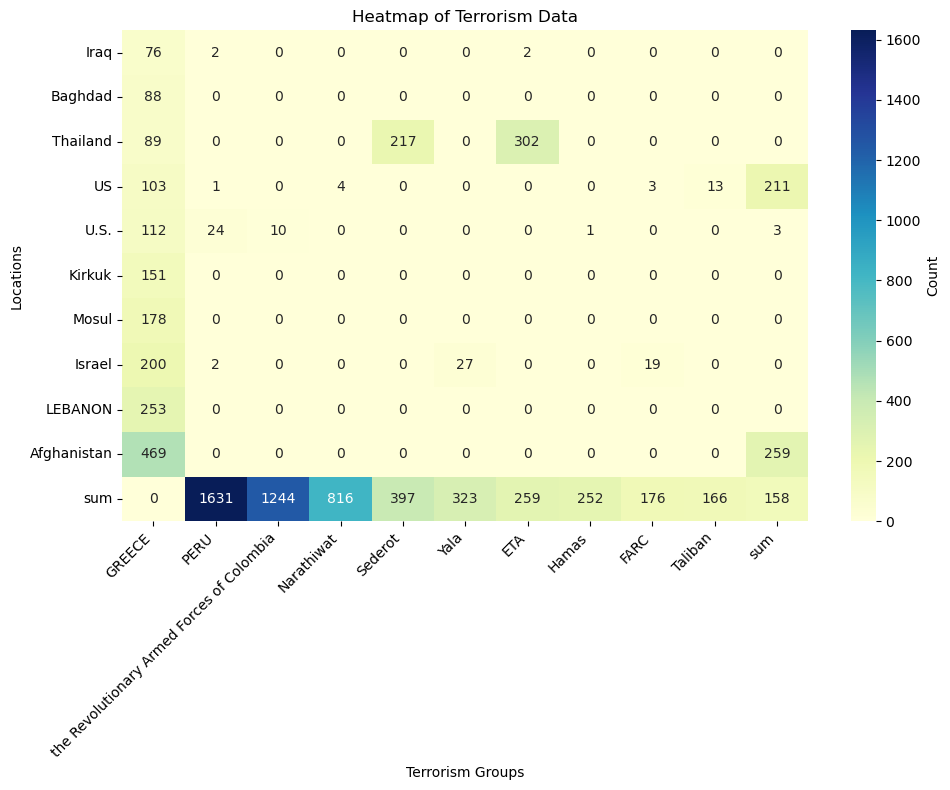

In [52]:
plt.figure(figsize=(10, 8))
sns.heatmap(data, annot=True, fmt="d", cmap="YlGnBu", xticklabels=x, yticklabels=y, cbar_kws={'label': 'Count'})
plt.title("Heatmap of Terrorism Data")
plt.xlabel("Terrorism Groups")
plt.ylabel("Locations")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()